In [4]:
#Fred Macro Economic Variables
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 

In [52]:
#GDP_CHINA
filename = "GDP_CHINA.xls"
fredgraph_df = pd.read_excel(filename, header=10)

fredgraph_df.dropna(how='any', inplace=True)
fredgraph_df

,observation_date,GDPChina
0,1960-01-01,5.971647e+10
1,1961-01-01,5.005687e+10
2,1962-01-01,4.720936e+10
3,1963-01-01,5.070680e+10
4,1964-01-01,5.970834e+10
...,...,...
56,2016-01-01,1.123328e+13
57,2017-01-01,1.231041e+13
58,2018-01-01,1.389482e+13
59,2019-01-01,1.427994e+13


In [15]:
fredgraph_df['observation_date']

0    1960-01-01
1    1961-01-01
2    1962-01-01
3    1963-01-01
4    1964-01-01
        ...    
56   2016-01-01
57   2017-01-01
58   2018-01-01
59   2019-01-01
60   2020-01-01
Name: observation_date, Length: 61, dtype: datetime64[ns]

In [56]:
fredgraph_df.rename(columns={"observation_date": "yyyymm"}, inplace=True)
fredgraph_df['year'] = pd.DatetimeIndex(fredgraph_df['yyyymm']).year
print(fredgraph_df['year'])

0     1960
1     1961
2     1962
3     1963
4     1964
      ... 
56    2016
57    2017
58    2018
59    2019
60    2020
Name: year, Length: 61, dtype: int64


In [57]:
fredgraph_df

,yyyymm,GDPChina,year
0,1960-01-01,5.971647e+10,1960
1,1961-01-01,5.005687e+10,1961
2,1962-01-01,4.720936e+10,1962
3,1963-01-01,5.070680e+10,1963
4,1964-01-01,5.970834e+10,1964
...,...,...,...
56,2016-01-01,1.123328e+13,2016
57,2017-01-01,1.231041e+13,2017
58,2018-01-01,1.389482e+13,2018
59,2019-01-01,1.427994e+13,2019


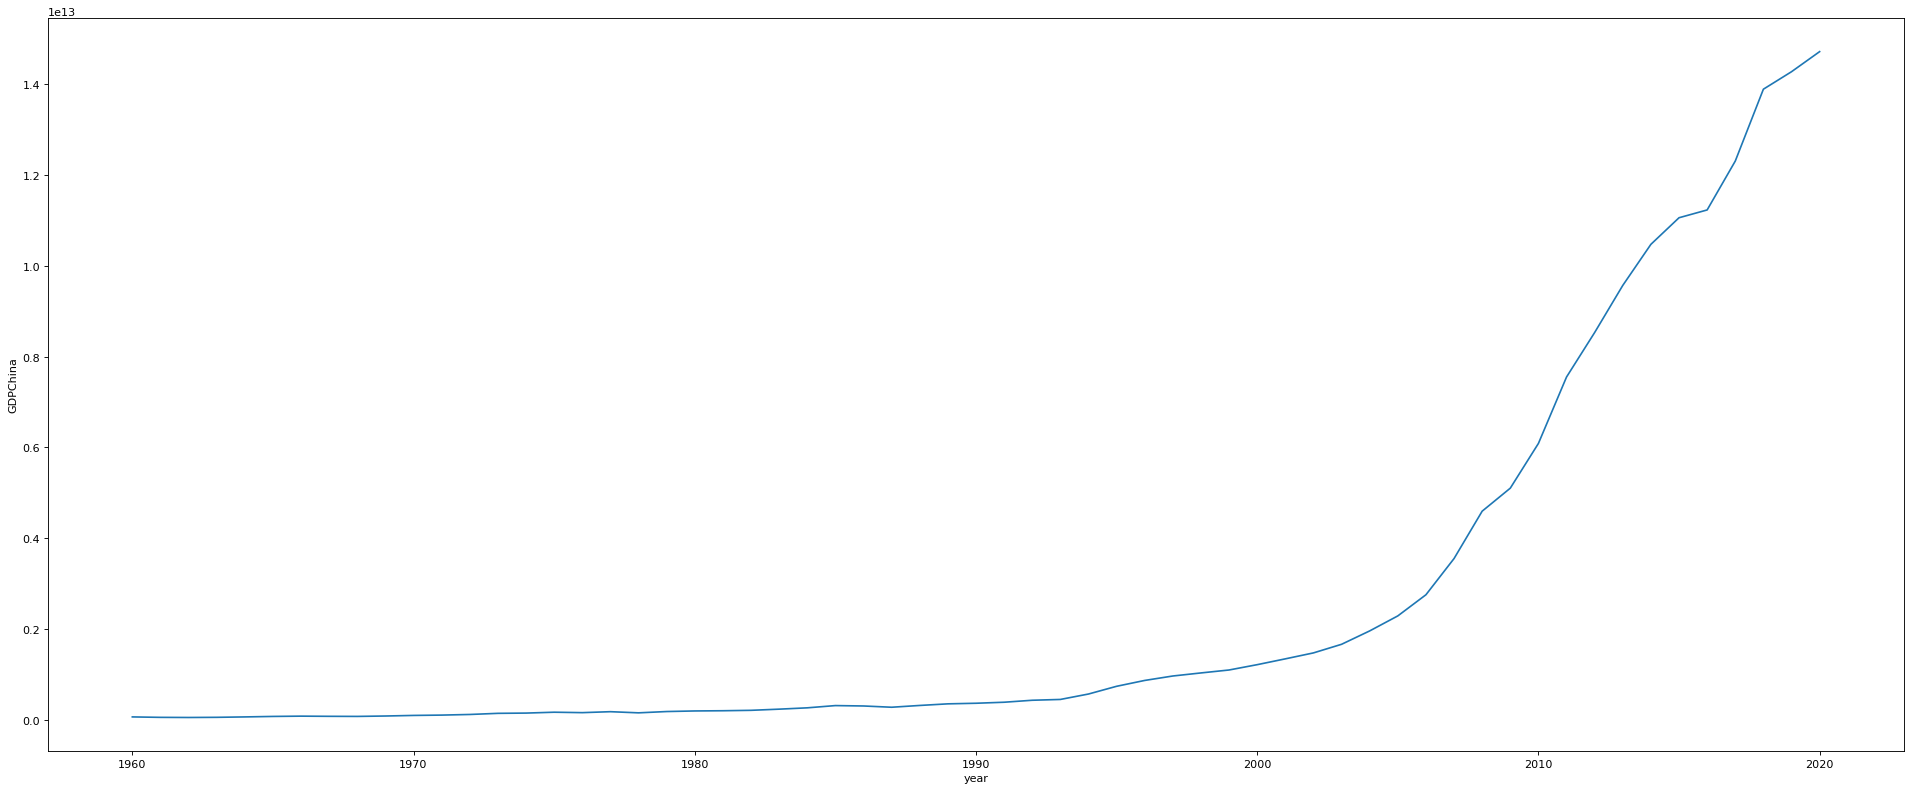

In [58]:
#Getting the graph for Year Vs GDP_China
from matplotlib.pyplot import figure

figure(figsize=(24, 10), dpi=80)

sns.lineplot(data=fredgraph_df,  x='year' , y='GDPChina')

In [32]:
#Get M2_US from Fred
filename = "M2_US.xls"
fredgraph_df_M2 = pd.read_excel(filename, header=10)

fredgraph_df_M2.dropna(how='any', inplace=True)
fredgraph_df_M2

,observation_date,M2_US
0,1959-01-01,286600000000
1,1959-02-01,287700000000
2,1959-03-01,289200000000
3,1959-04-01,290100000000
4,1959-05-01,292200000000
...,...,...
694,2016-11-01,13147900000000
695,2016-12-01,13180900000000
696,2017-01-01,13260500000000
697,2017-02-01,13299300000000


In [34]:
fredgraph_df_M2.rename(columns={"observation_date": "yyyymm"}, inplace=True)
fredgraph_df_M2['year'] = pd.DatetimeIndex(fredgraph_df_M2['yyyymm']).year
print(fredgraph_df_M2['year'])

0      1959
1      1959
2      1959
3      1959
4      1959
       ... 
694    2016
695    2016
696    2017
697    2017
698    2017
Name: year, Length: 699, dtype: int64


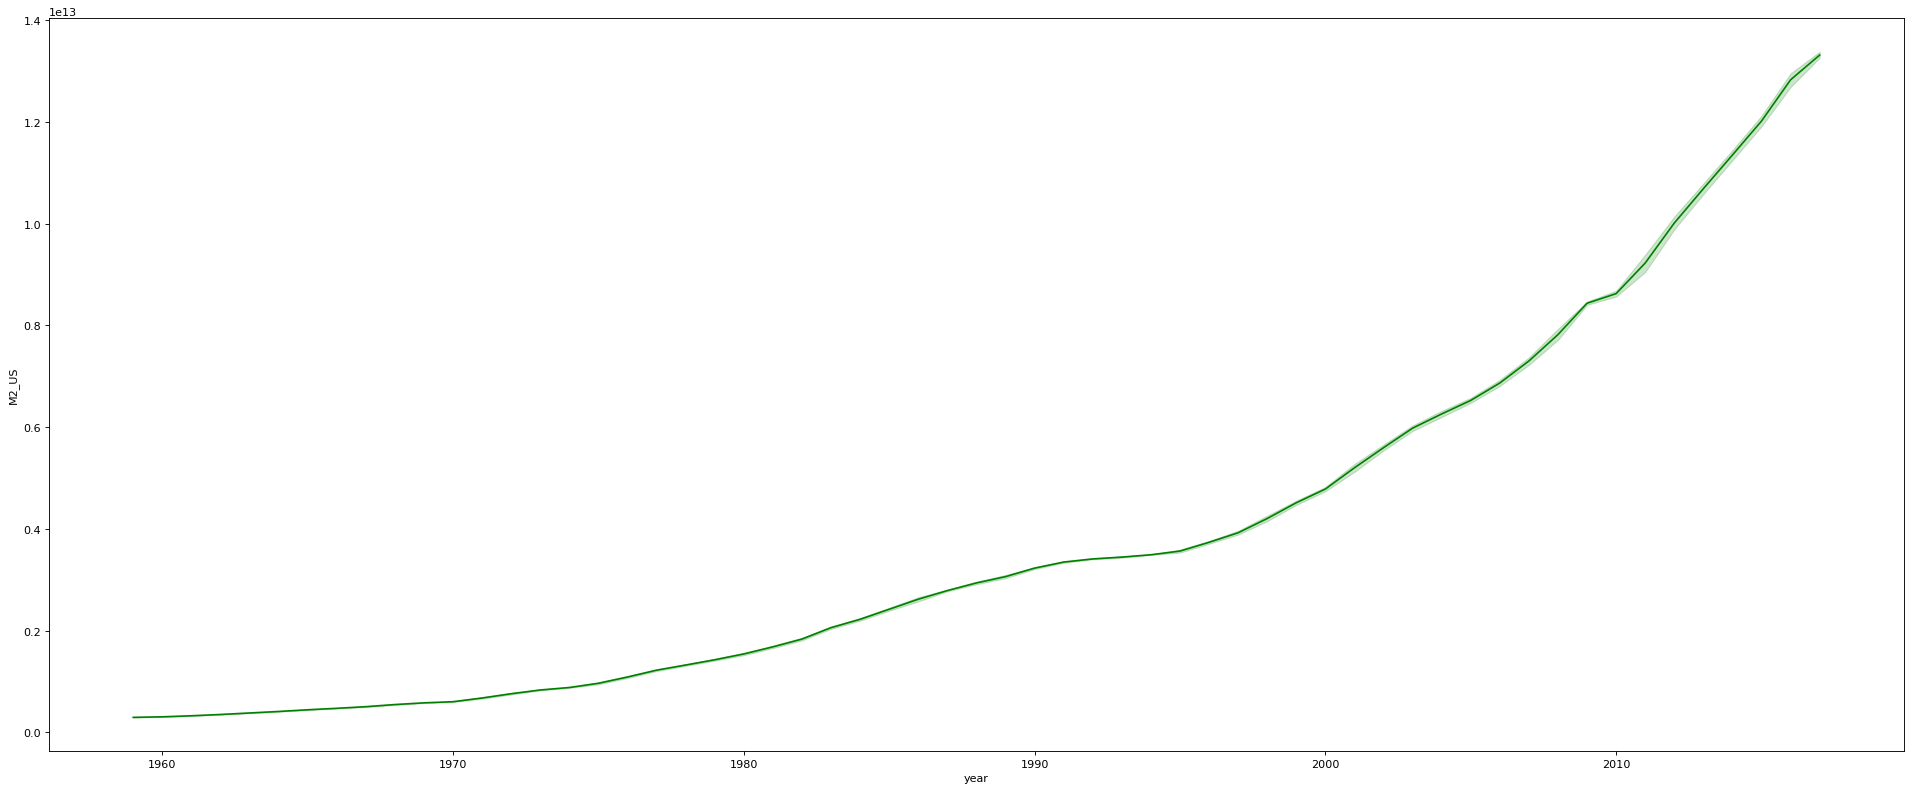

In [61]:
#Graph for M2_US Vs Year
from matplotlib.pyplot import figure

figure(figsize=(24, 10), dpi=80)
sns.lineplot(data=fredgraph_df_M2,  x='year' , y='M2_US', color='green')

In [59]:
#Merging both M2_US and GDP_China
merged_df = pd.merge(fredgraph_df, fredgraph_df_M2, on = 'year', how='left')

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 689
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   yyyymm_x  690 non-null    datetime64[ns]
 1   GDPChina  690 non-null    float64       
 2   year      690 non-null    int64         
 3   yyyymm_y  687 non-null    datetime64[ns]
 4   M2_US     687 non-null    float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 32.3 KB


In [64]:
#Melt the merged Data
from matplotlib.pyplot import figure

figure(figsize=(24, 10), dpi=80)

merged_df_melted = merged_df. melt('year',  var_name ='FRED_MACROECONOMIC_VARIABLE', value_name='GDP/M2')

merged_df_melted.dropna(axis='index', how='any', subset=['GDP/M2'], inplace=True)
merged_df_melted

,year,FRED_MACROECONOMIC_VARIABLE,GDP/M2
0,1960,yyyymm_x,1960-01-01 00:00:00
1,1960,yyyymm_x,1960-01-01 00:00:00
2,1960,yyyymm_x,1960-01-01 00:00:00
3,1960,yyyymm_x,1960-01-01 00:00:00
4,1960,yyyymm_x,1960-01-01 00:00:00
...,...,...,...
2752,2016,M2_US,1.31479e+13
2753,2016,M2_US,1.31809e+13
2754,2017,M2_US,1.32605e+13
2755,2017,M2_US,1.32993e+13


<Figure size 1920x800 with 0 Axes>

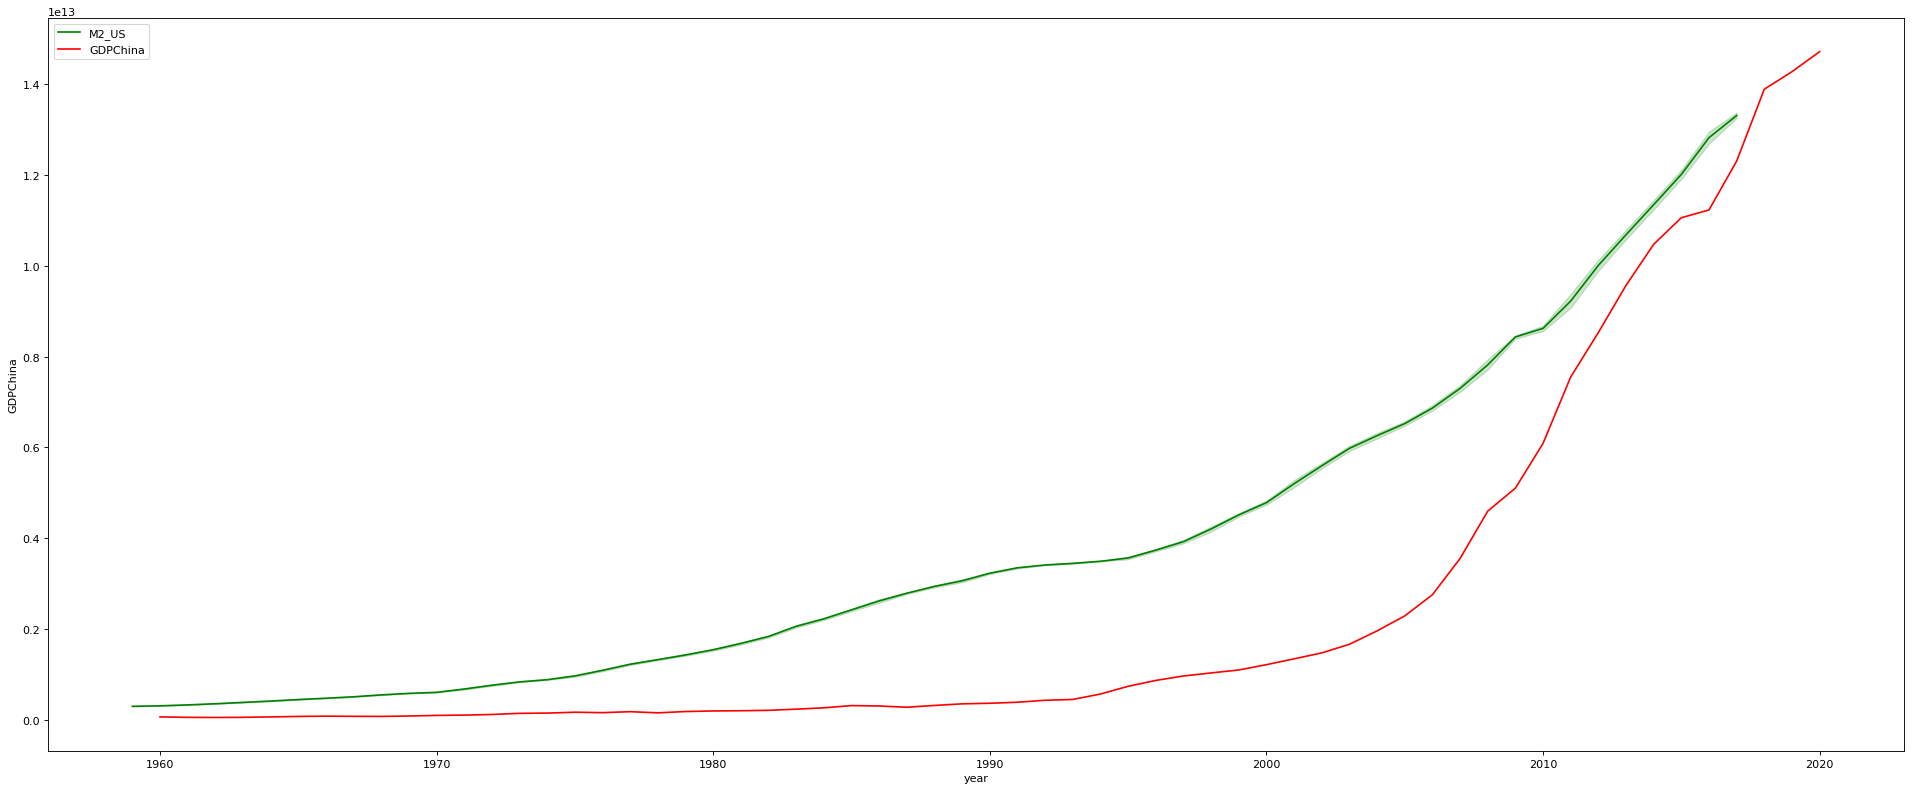

In [78]:
#Graph for Both Data M2_US and GDPChina.
from matplotlib.pyplot import figure

figure(figsize=(24, 10), dpi=80)
sns.lineplot(data=fredgraph_df_M2,  x='year' , y='M2_US', color='green', label='M2_US')
sns.lineplot(data=fredgraph_df,  x='year' , y='GDPChina', color='red',label ='GDPChina')
#plt.legend()
plt.show()